In [1]:
# Import modules
import matplotlib.pyplot as plt                                             
import matplotlib as mpl                                                    
import cmcrameri.cm as cmc                                                  
import cartopy.feature as cf                                                
import cartopy.crs as ccrs                                                  
import configparser                                                         
from pathlib import Path                                                    
import psyplot.project as psy                                               
import argparse                                                             
import sys                                                                  
import six 

In [2]:
# Read in grid information (only if nc file is missing the information!)                          

# Function for encoding
def add_encoding(obj):                                                      
    obj.encoding['coordinates'] = 'clat clon' 

grid_ds = psy.open_dataset('../data/ICON-1E_DOM01.nc')                               
icon_ds = psy.open_dataset('../data/lfff01000000.nc').squeeze()               
ds = icon_ds.rename({"ncells":"cell"}).merge(grid_ds)               
for k, v in six.iteritems(ds.data_vars):                            
    add_encoding(v) 

In [3]:
# Read in input file (if grid information is not missing)
ds = psy.open_dataset('../data/my_exp1_atm_3d_ml_20180921T000000Z.nc') 

In [4]:
# show figures after they are drawn or updated
# Set colorbar
psy.rcParams['auto_show'] = True
%matplotlib inline
%config InlineBackend.close_figures = False

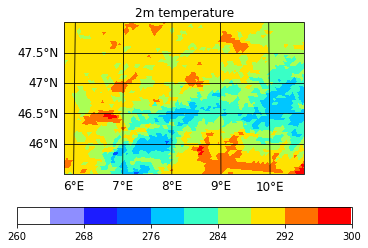

In [5]:
# create psyplot instance
# name: name of variable
# projection: e.g. robin
# bounds: Define min and max of colorbar
# map_extent: borders of map (example for Switzerland)
lonmin = 5.8
lonmax = 10.7
latmin = 45.5
latmax = 48.0
# title: title of plot
# xgrid/ygrid: Add grids
pp = psy.plot.mapplot(ds,                                                   
    name = 't_2m',                                                        
    t = 0,                                                                 
    projection = 'robin',                                                
    bounds = {'method': 'minmax', 'vmin':260, 'vmax':300},
    map_extent = [lonmin, lonmax, latmin, latmax],                          
    title = '2m temperature') 

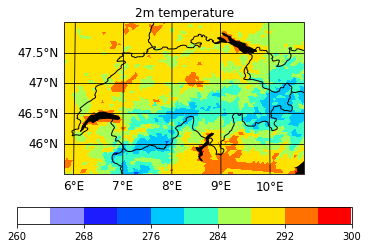

In [6]:
# Add borders and lakes with cartopy
ax = pp.plotters[0].ax
resol = '10m'                                                                  
lakes = cf.NaturalEarthFeature(category='physical', name='lakes', scale=resol, edgecolor='k', facecolor='k')                                                          
ax.add_feature(cf.BORDERS)                                                     
ax.add_feature(lakes)

pp.update()

/Users/alauber/opt/anaconda3/envs/psyplot/lib/python3.7/site-packages/psy_simple/plotters.py:3039: MatplotlibDeprecationWarning: 
The on_mappable_changed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use update_normal instead.
  mappable.changed()


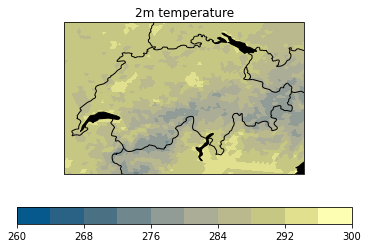

In [7]:
# Remove grid and set colorbar
pp.update(xgrid = False, ygrid = False, cmap='cmc.nuuk')

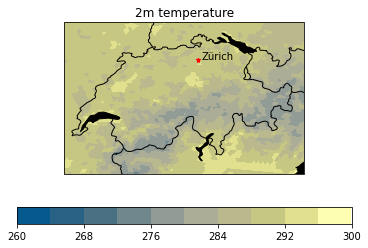

In [8]:
# Add coordinates (e.g. Zürich)
lon = 8.54
lat = 47.38
llon = lonmax-lonmin
llat = latmax-latmin
pos_lon = (lon-lonmin)/llon
pos_lat = (lat-latmin)/llat

# go to matplotlib level for adding coordinate                                                                                                    
fig = plt.gcf()
fig.axes[0].plot(pos_lon, pos_lat,'r',marker='*', markersize=5, transform=fig.axes[0].transAxes) 
fig.axes[0].text(pos_lon+llon*0.003, pos_lat+llat*0.003, 'Zürich', transform=fig.axes[0].transAxes)

pp.update()

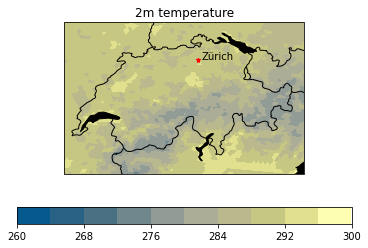

In [9]:
# save figure 
pp.update()                                                                                                                                                                                     
output_file = 'mapplot_example'                                                                                                                                  
plt.savefig(output_file) 